In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import ModelWriters.Simulation.BaseSimulator as BS

In [4]:
import ModelWriters.Simulation as Simulation

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
import math

In [ ]:
base_sim = BS.BaseSimulator(model = 'linear')

In [ ]:
base_sim.a_hourly = 1.0
base_sim.a_daily = 100.0

In [ ]:
s = {}
s['day'] = 10
s['hour'] = 15

In [ ]:
base_sim.simulate(s)

In [ ]:
base_sim = BS.BaseSimulator(model = 'piecewise', post_random_model = 'gauss', post_random_up = 0.1, post_random_down=0.05)

In [ ]:
for h in range(24):
    s['hour'] = h
    print(10*base_sim.simulate(s))

In [ ]:
import ModelWriters.Simulation.Demand as DS

In [ ]:
demand = DS.DemandSimulator(post_random_up = 0.2, post_random_down = 0.2)

In [ ]:
dias = [355, 100, 172, 250]
horas = range(24)

scenes = []

for d in dias:
    for h in horas:
        scenes.append({'day': d, 'hour': h})

In [ ]:
demand_sim = []

for s in scenes:
    demand_sim.append(demand.simulate(s))

In [ ]:
# Set the plot curve with markers and a title
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
##a=180*24
#b=360
##b=180*24+5*24
a=0
b=24
#for col in Resultados:
#    ax.plot(Resultados[col][a:b], label = col)

ax.plot(demand_sim, label = 'Load')

#ax.plot(Resultados['time'][240:360], Resultados['p_mw_PV'][240:360], label = 'PV')
#ax.plot(Resultados['time'][240:360], Resultados['p_mw_Load'][240:360], label = 'Load')

ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
demand = DS.DemandSimulator(post_random_up = 0.15, post_random_down = 0.15, summer_peak = 0.1, winter_peak=0.2)

scenes = []

for d in range(365):
    for h in horas:
        scenes.append({'day': d, 'hour': 21.0})
        
demand_sim = []

for s in scenes:
    demand_sim.append(demand.simulate(s))

In [ ]:

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(demand_sim, label = 'Picos en el anno')
ax.set_xlabel('dia')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
import ModelWriters.Simulation.Solar as SS 

In [ ]:
demand = SS.SolarIrradianceSimulator()

dias = [355, 100, 172, 250]
horas = range(24)

scenes = []

for d in dias:
    for h in horas:
        scenes.append({'day': d, 'hour': h})
        
demand_sim = []

for s in scenes:
    demand_sim.append(demand.simulate(s))
    
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)

ax.plot(demand_sim, label = 'Irradiation')

ax.set_xlabel('time')
ax.set_ylabel('I[w/m2]')

ax.legend()

ax.grid(True)


plt.show()
    

In [ ]:
sun = SS.SolarIrradianceSimulator()

scenes = []
days = [d for d in range(365)]
for d in days:
        scenes.append({'day': d, 'hour': 13.0})
        
sun_sim = []

for s in scenes:
    sun_sim.append(sun.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(days, sun_sim, label = 'Noon irradiance')
ax.set_xlabel('day')
ax.set_ylabel('I[W/m2]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
import math

In [ ]:
math.exp(1)

In [ ]:
math.floor(363/30)

In [ ]:
month = math.floor(363/30)

In [ ]:
month = 11 if month >= 12 else month
month

In [ ]:
import ModelWriters.Simulation.Economics as Economics

In [ ]:
npv = Economics.DeterministicGrowthSimulator(annual_rate = 0.1)

npv.base = 1.5
npv.monthly_rate = 0.005
scenes = []
days = [d for d in range(365)]
years = [y for y in range(20)]
for y in years:
    for d in days:
        scenes.append({'year': y, 'day': d, 'hour': 13.0})
        
sim = []

for s in scenes:
    sim.append(npv.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'V')
ax.set_xlabel('day')
ax.set_ylabel('Value')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
npv = Economics.PVSimulator(annual_rate = 0.1, base = 5.0)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(20)]
for y in years:
    for d in days:
        scenes.append({'year': y, 'day': d, 'hour': 13.0})
        
sim = []

for s in scenes:
    sim.append(npv.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'NPV')
ax.set_xlabel('day')
ax.set_ylabel('Discount Rate')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
npv = Economics.PVSimulator(annual_rate = 0.0, daily_rate = 0.1/365)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(20)]
for y in years:
    for d in days:
        scenes.append({'year': y, 'day': d, 'hour': 13.0})
        
sim = []

for s in scenes:
    sim.append(npv.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'NPV')
ax.set_xlabel('day')
ax.set_ylabel('Discount Rate')

ax.legend()

ax.grid(True)


plt.show()

print("DR: {0} YR: {1}".format(npv.daily_rate, npv.annual_rate))

In [ ]:
v = Economics.ElectricityCostSimulator()

scenes = []
days = [d for d in range(3)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []

for s in scenes:
    sim.append(v.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'Electricity Cost (Client)')
ax.set_xlabel('hour')
ax.set_ylabel('Price')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
#Weibull parameters
c = 7.8/0.886
k = 2.0

In [ ]:
import ModelWriters.Simulation.Wind as Wind

Pure Weibull

In [ ]:
w = Wind.Weibull(c, k)

scenes = []
days = [d for d in range(10)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
v = 0.0
for s in scenes:
    v = w.simulate(s)
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
w = Wind.CorrelatedWeibull(c, k)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
hg = [0 for i in range(100)]
delta = 0.5

v = 0.0
for s in scenes:
    v = w.simulate(s)
    b = math.floor(v/delta)
    hg[b] = hg[b] + 1
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(hg, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

print(sum(sim)/len(sim))

Temporally-correlated Weibull

In [ ]:
w = Wind.CorrelatedWeibull(c, k)

scenes = []
days = [d for d in range(10)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
v = 0.0
for s in scenes:
    v = w.simulate(s)
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(sim, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
w = Wind.CorrelatedWeibull(c, k)

scenes = []
days = [d for d in range(365)]
years = [y for y in range(1)]
for y in years:
    for d in days:
        for h in range(24):
            scenes.append({'year': y, 'day': d, 'hour': h})
        
sim = []
hg = [0 for i in range(100)]
delta = 0.5

v = 0.0
for s in scenes:
    v = w.simulate(s)
    b = math.floor(v/delta)
    hg[b] = hg[b] + 1
    sim.append(v)

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(hg, label = 'Wind Speed')
ax.set_xlabel('hour')
ax.set_ylabel('v')

ax.legend()

ax.grid(True)


plt.show()

print(sum(sim)/len(sim))

In [ ]:
int(5.99)

In [ ]:
user_summer = pd.read_csv('.\\Data\\UserComSum.csv', header = None, squeeze = True) 

In [ ]:
user_summer

In [ ]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(user_summer)
    
ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
di = Simulation.DailyInterpolator()

In [ ]:
di.simulate(scenes.iloc[100])

In [ ]:
di.add_day(355, [h for h in range(len(user_summer))], user_summer)

In [ ]:
di.simulate(scenes.iloc[100])

In [ ]:
res = [di.simulate(scenes.iloc[i]) for i in range(len(scenes))]

In [ ]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(res[240:240+48])
    
ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
user_winter = pd.read_csv('.\\Data\\UserComWin.csv', header = None, squeeze = True)
user_winter

In [ ]:
di = Simulation.DailyInterpolator()

In [ ]:
di.add_day(81, [h for h in range(len(user_summer))], user_summer*0.5)

In [ ]:
di.add_day(172, [h for h in range(len(user_summer))], user_summer)

In [ ]:
di.add_day(264, [h for h in range(len(user_summer))], -0.5*user_summer)

In [ ]:
di.add_day(355, [h for h in range(len(user_summer))], -1.0*user_summer)

In [ ]:
#di.data_days

In [ ]:
di.simulate({'day': 81, 'hour': 12})

In [ ]:
res = [di.simulate({'day':i, 'hour': 15}) for i in range(366)]

In [ ]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(res)
    
ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [ ]:
d = {6: 2, 7: 3, 5: 1, 2:2}

In [ ]:
import math

In [ ]:
math.asin(0.5)*180/math.pi

In [ ]:
calculate_sunrise_sunset(lat=-34.88, long=-58.58, day=198, sunrise = False, text = True)

In [ ]:
[15 + math.floor(365.0/12.0*i)  for i in range(12)]

In [ ]:
5/3

In [22]:
ssim = Simulation.MonthlySolarIrradianceSimulator()

In [23]:
msi = [7.5e3, 7.2e3, 6.5e3, 5.5e3, 4.5e3, 3.5e3, 2.5e3, 3.5e3, 4.5e3, 6.0e3, 7.0e3, 8.5e3]

In [24]:
ssim.set_monthly_coefficients(msi)

In [25]:
ssim.monthly_coefficients

[0.8450470492508327,
 0.9478979826292501,
 0.855741234318073,
 0.8711144217849497,
 0.7934714131880923,
 0.6171444324796274,
 0.3959611008113407,
 0.5543455411358771,
 0.6470023229773799,
 0.7899149855243751,
 0.8499538825558236,
 0.9577199891509437]

In [26]:
ssim.model_a

0.2

In [27]:
ssim.model_b

1.0

In [28]:
ssim.model_c

[1.335141147752498,
 1.64369394788775,
 1.367223702954219,
 1.413343265354849,
 1.1804142395642767,
 0.6514332974388821,
 -0.012116697565977885,
 0.4630366234076313,
 0.7410069689321397,
 1.1697449565731253,
 1.3498616476674705,
 1.6731599674528308]

In [29]:
ssim.simulate_day_coefficient(15)

0.8784432293423043

In [30]:
data = [ssim.simulate_day_coefficient(355) for i in range(10000)]

In [31]:
max(data)

1.0999993543617088

In [32]:
bines = 20
maxx = 1.5
delta = maxx/bines
histo = [0.0 for i in range(bines)]
for d in data:
    try:
        b = math.floor(d/delta)
        histo[b] += 1/bines
    except:
        print(d, b)

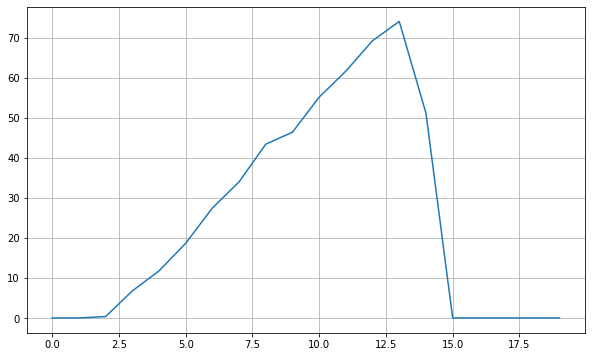

In [33]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(histo)

ax.grid(True)


plt.show()

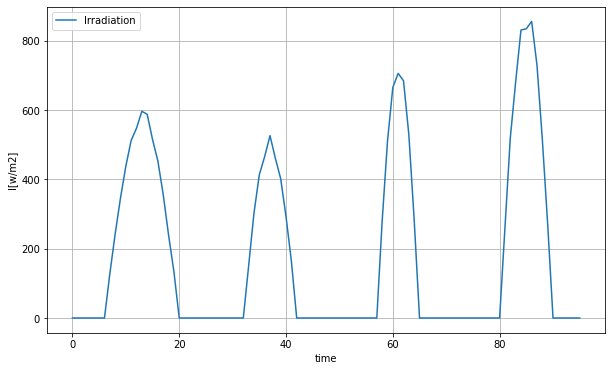

In [34]:
dias = [355, 100, 172, 250]
horas = range(24)

scenes = []

for d in dias:
    for h in horas:
        scenes.append({'day': d, 'hour': h})
        
demand_sim = []

for s in scenes:
    demand_sim.append(ssim.simulate(s))
    
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)

ax.plot(demand_sim, label = 'Irradiation')

ax.set_xlabel('time')
ax.set_ylabel('I[w/m2]')

ax.legend()

ax.grid(True)


plt.show()
    

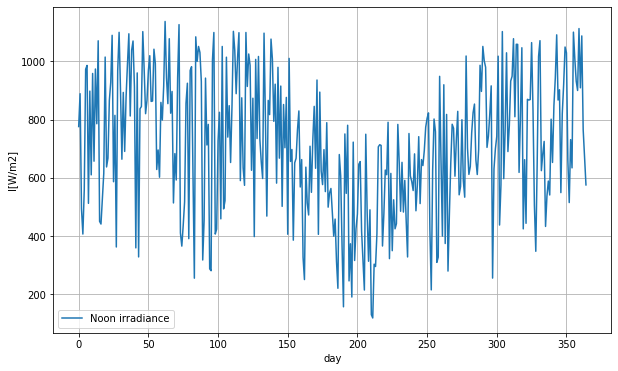

In [35]:


scenes = []
days = [d for d in range(365)]
for d in days:
        scenes.append({'day': d, 'hour': 13.0})
        
sun_sim = []

for s in scenes:
    sun_sim.append(ssim.simulate(s))

fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
ax.plot(days, sun_sim, label = 'Noon irradiance')
ax.set_xlabel('day')
ax.set_ylabel('I[W/m2]')

ax.legend()

ax.grid(True)


plt.show()